In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import fig_settings as fs

fs.set_fonts()

In [3]:
colors = ["#2d5d83", "#4f9bd9", "#077187", "#3dfaff", "#8b888e"]

In [4]:
sccs = np.loadtxt("data/follows_sccs.csv.gz", dtype=int)
component_sizes, component_numbers = np.unique(sccs, return_counts=True)
print(max(component_sizes))

16594500


In [5]:
in_degree = np.loadtxt("data/follows_in-degree.csv.gz", dtype=int)
print(f"Min in-degree is ", in_degree.min())
print(f"Max in-degree is ", in_degree.max())
print(f"Mean in-degree is ", in_degree.mean())

Min in-degree is  1
Max in-degree is  19946766
Mean in-degree is  92.4723510905637


In [6]:
out_degree = np.loadtxt("data/follows_out-degree.csv.gz", dtype=int)
print(f"Min out-degree is ", out_degree.min())
print(f"Max out-degree is ", out_degree.max())
print(f"Mean out-degree is ", out_degree.mean())

Min out-degree is  1
Max out-degree is  449058
Mean out-degree is  64.75218805288299


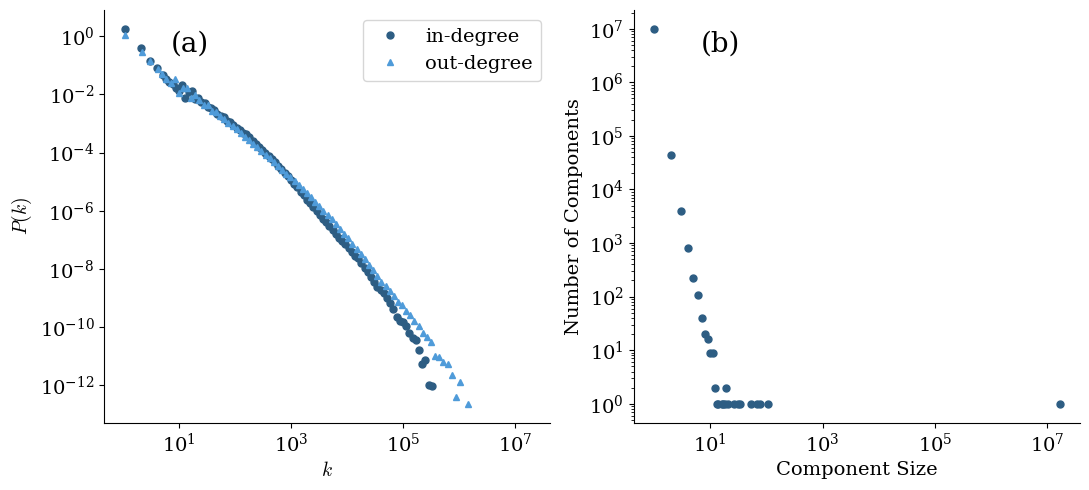

In [7]:
# plot SCC size distribution
plt.figure(figsize=(11, 5), dpi=100)
plt.subplot(121)
ax = plt.gca()
plt.text(0.15, 0.9, "(a)", fontsize=20, transform=ax.transAxes)

# get out-degree distribution plot
hist, bin_edges = np.histogram(
    out_degree,
    bins=np.logspace(np.log10(out_degree.min()), np.log10(out_degree.max()), 100),
    density=True,
)
bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]
plt.plot(bin_centers, hist, "o", color=colors[0], markersize=5, label="in-degree")
plt.xscale("log")
plt.yscale("log")

hist, bin_edges = np.histogram(
    in_degree,
    bins=np.logspace(np.log10(in_degree.min()), np.log10(in_degree.max()), 100),
    density=True,
)
bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]
plt.plot(bin_centers, hist, "^", color=colors[1], markersize=5, label="out-degree")
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.legend()
sns.despine()


plt.subplot(122)
ax = plt.gca()
plt.text(0.15, 0.9, "(b)", fontsize=20, transform=ax.transAxes)

plt.plot(component_sizes, component_numbers, "o", markersize=5, color=colors[0])
plt.xscale("log")
plt.yscale("log")
sns.despine()
plt.xlabel("Component Size")
plt.ylabel("Number of Components")

plt.tight_layout()
plt.savefig("figures/following_network_stats.pdf", dpi=1000)